Random Forests (RFs) are composed of multiple independent decision trees that are trained independently on a random subset of data.

# importing Libraries.

In [5]:
#importing Libraries.
import pandas as pd #for data manupulation or analysis
import numpy as np # for mumeric calculation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import os
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# import dataset 

In [6]:
#import the dataframe as dataset.
dataset=pd.read_csv('Social_Network_Ads.csv')

In [7]:
#reading dataset
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Exploratory data analysis 

In [8]:
dataset.shape

(400, 5)

In [9]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [10]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.1+ KB


In [12]:
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# Data visualization

<AxesSubplot:>

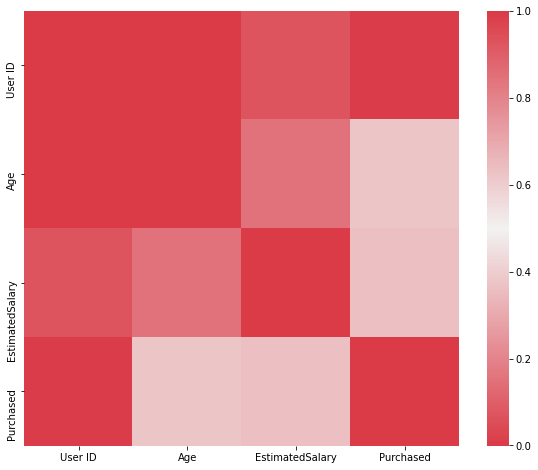

In [13]:
# correlation plot

f, ax = plt.subplots(figsize = (10, 8))

corr = dataset.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(10, 10, as_cmap = True), square = True, ax = ax)

In [14]:
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(x.shape)
print(y.shape)

(400, 2)
(400,)


# Identify And Select Most Important Features

In [27]:
# Split the data into 40% test and 60% training
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(x_train, y_train)

# Print the name and gini importance of each feature
for feature in zip(dataset, clf.feature_importances_):
    print(feature)

('User ID', 0.515993525513363)
('Gender', 0.4840064744866371)


The scores above are the importance scores for each variable. There are two things to note. First, all the importance scores add up to 50%. Second, Gender is far more important than the other features.Clearly these are the most importance features.

In [28]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(clf, threshold=0.15)

# Train the selector
sfm.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10000, n_jobs=-1,
                                                 random_state=0),
                threshold=0.15)

In [29]:
#Gender data  
#for Gender Variable  
from sklearn.preprocessing import LabelEncoder  
label_encoder_x= LabelEncoder()  
x[:, 1]= label_encoder_x.fit_transform(x[:, 1])  

In [30]:
#for Gender Variable  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  
label_encoder_x= LabelEncoder()  
x[:, 1]= label_encoder_x.fit_transform(x[:, 1])

#Encoding for dummy variables  
onehot_encoder= OneHotEncoder()    
x= onehot_encoder.fit_transform(x).toarray()  
print(x)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_important = sc.fit_transform(x_train)
x_test_important = sc.transform(x_test)

Now we can fit our Random Forest regressor.In a real project, we must optimize the values of the hyperparameters.

In [38]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, 
                criterion = 'entropy', random_state = 0)
classifier.fit(x_train_important, y_train)
y_pred=clf.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.6312


In [40]:
y_important_pred = classifier.predict(x_test_important)

accuracy_score(y_test, y_important_pred)

0.91875

In [41]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[101   0]
 [ 59   0]]


In [42]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       101
           1       0.00      0.00      0.00        59

    accuracy                           0.63       160
   macro avg       0.32      0.50      0.39       160
weighted avg       0.40      0.63      0.49       160



In [44]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_test, y_test
 
aranged_ages = np.arange(start = x_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.01)
aranged_salaries = np.arange(start = x_set[:, 1].min(), stop = X_set[:, 1].max(), step = 0.01)
 
X1, X2 = np.meshgrid(aranged_ages, aranged_salaries)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
     alpha = 0.5, cmap = ListedColormap(('orange', 'blue')))


plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show() 


NameError: name 'X_set' is not defined

In this project, I build a Random Forest Classifier to predict the customer will purchased product or not.The explanatory and target variables are being defined.
The train test split function is used for predictors and target.The ratio is set 60% for training sample and 40% for test sample.The accuracy score as per the random forest model is 91%% of the sample correctly.I have used the Random Forest model to find only the important features, 
build the model using these features and see its effect on accuracy. The most important feature is safety and least important feature is age.
